# Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv")

In [3]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [4]:
df.drop(columns='Index', inplace=True)

In [5]:
df.rename(columns={'Height(Inches)':'Height',
                   'Weight(Pounds)':'Weight'
                  }, inplace=True)

In [6]:
df

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


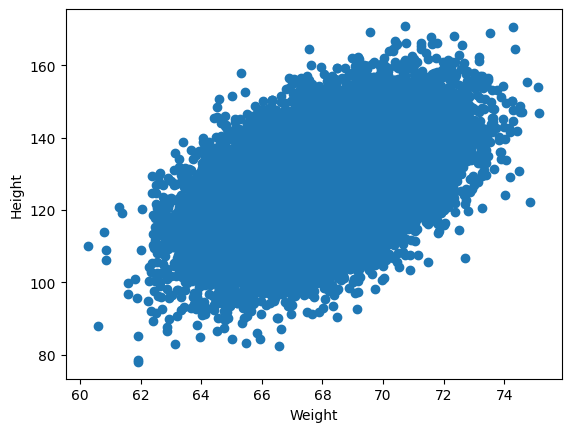

In [7]:
plt.scatter(df.Height, df.Weight)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [9]:
df.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [10]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

## Divided our dataset into Independent and Dependent Features

In [11]:
X = df[['Weight']] ## Independant Feature
y = df['Height'] ## Depeendant Feature

In [12]:
X.shape, y.shape

((25000, 1), (25000,))

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape, X_test.shape

((20000, 1), (5000, 1))

In [16]:
y_train.shape, y_test.shape

((20000,), (5000,))

## Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.61959496],
       [-1.29909507],
       [ 0.76587649],
       ...,
       [ 1.212802  ],
       [ 0.21044337],
       [ 0.65975876]])

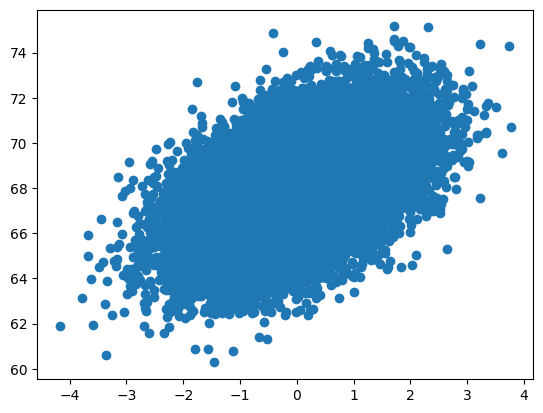

In [22]:
plt.scatter(X_train,y_train)

## Model Training

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()

## Training the train Data

In [25]:
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
regressor.intercept_

67.99034523350001

In [27]:
regressor.coef_

array([0.95022131])

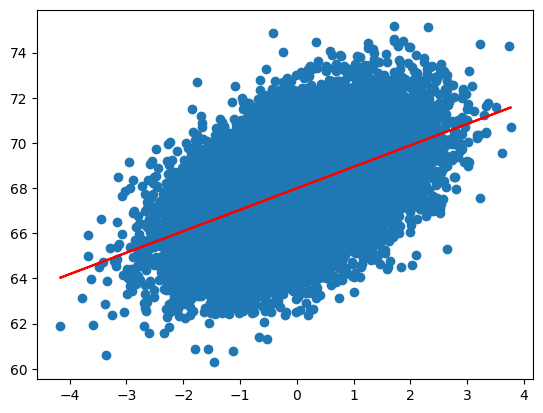

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r') 

## Prediction of train Data
     1. Predicted height output = intercept + coef_(Weight)
     2. y_pred_train = 67.99034523350001 + 0.95022131 (X_train)
## Prediction of test Data
     
     1. Predicted height output = intercept + coef_(weight)
     2. y_pred_test = 67.99034523350001 + 0.95022131 (X_test)

## Prediction for test Data

In [29]:
y_pred_test = regressor.predict(X_test)

In [30]:
y_pred_test

array([68.57909757, 66.75591741, 68.7180974 , ..., 69.14277554,
       68.19031301, 68.61726207])

## Performace Metrice (MAE,MSE, RMSE)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mae)
print(mse, mae,rmse)

2.7249628460650364 1.3163040569300668 1.1473029490636144


## Accuracy of the Model R Squared and Adjuested R Squared

## R Squared


In [33]:
from sklearn.metrics import r2_score


In [34]:
score = r2_score(y_test,y_pred_test)

In [35]:
score

0.2605563163045014

## Adjusted R Square

In [36]:
scaler

StandardScaler()

In [37]:
regressor

LinearRegression()